<h4>
Hello Leo, 

This was my first attempt at such a dataset. I would love to get your feedback. 
I certainly feel I can do better with a little more domain experience. 

Thank you,
Ajinkya Lahade 
<h4>


<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

In [1]:
#Load the librarys
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

In [2]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
#Looking unique values
print(df_credit.nunique())


Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


<h3>We are counting the number total people in the dataset having a risk score.<h3>

In [5]:


print('Total number of people with risk score:')
print(df_credit.Risk.count())

Total number of people with risk score:
1000


In [6]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls
import warnings 
from collections import Counter 

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Risk variable distribution(Target value)'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

<h3> The histogram below shows the age distribution with the credit risk percentage associated with each age group. <h3>


In [7]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()


fig1_1= go.Histogram(x=df_good,histnorm='percent',name="Good Credit")

fig1_2= go.Histogram(x=df_bad, histnorm='percent',name="Bad Credit",autobinx=False)

fig1_3= go.Histogram(x=df_age,histnorm='percent',name="Overall Age")

fig = tls.make_subplots(rows=2, cols=2,subplot_titles=('Good Credit Percentage','Bad Credit Percentage', 'General Distribuition'))


fig.append_trace(fig1_1, 1, 1)
fig.append_trace(fig1_2, 1, 2)
fig.append_trace(fig1_3, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='A1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

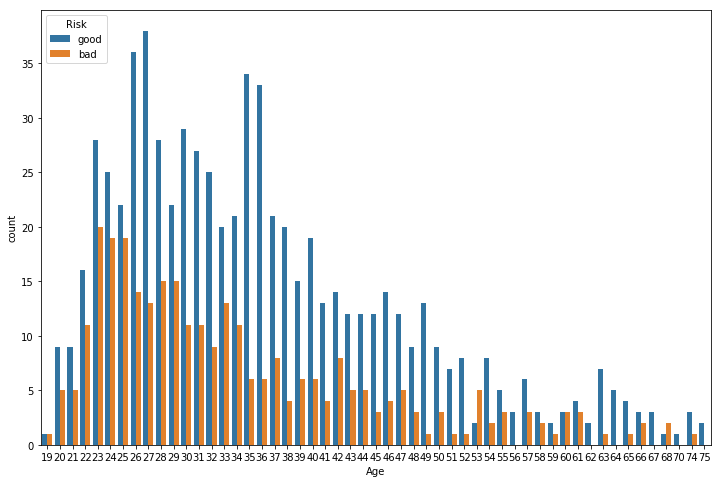

In [8]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Age", hue="Risk", data=df_credit)
fig.tight_layout


In [9]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

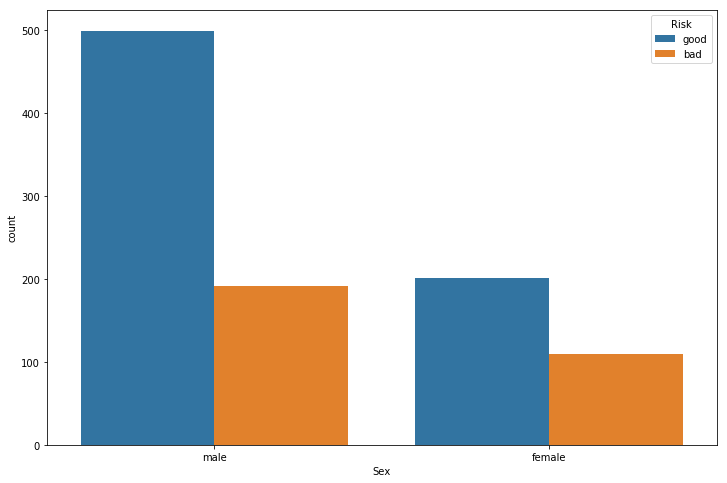

In [10]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Sex", hue="Risk", data=df_credit)
fig.tight_layout


<h3>Distribution of Risk with respect to housing status (own,rent or free)<h3>

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

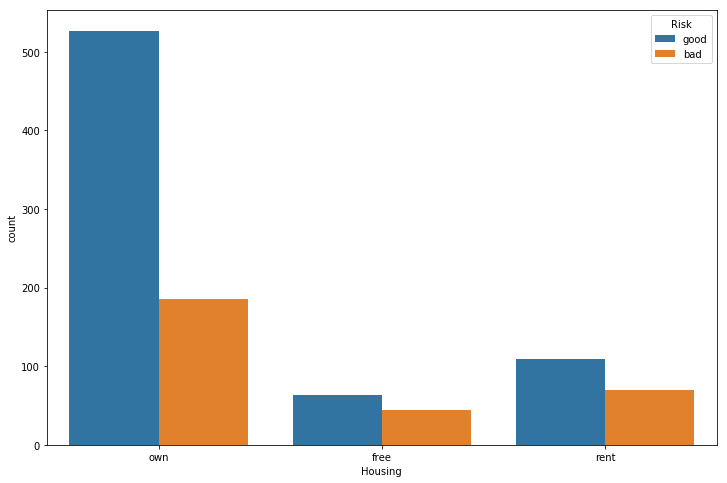

In [11]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Housing", hue="Risk", data=df_credit)
fig.tight_layout


<h3>Distribution of risk with respect to the savings accounts' balance <b>Saving accounts</b> (text - little(0), moderate(1), quite rich(2), rich(3)<br><h3>

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

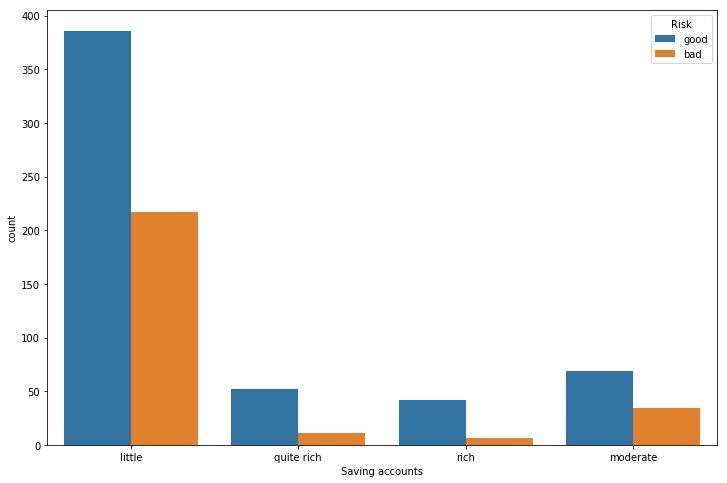

In [12]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Saving accounts", hue="Risk", data=df_credit)
fig.tight_layout

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


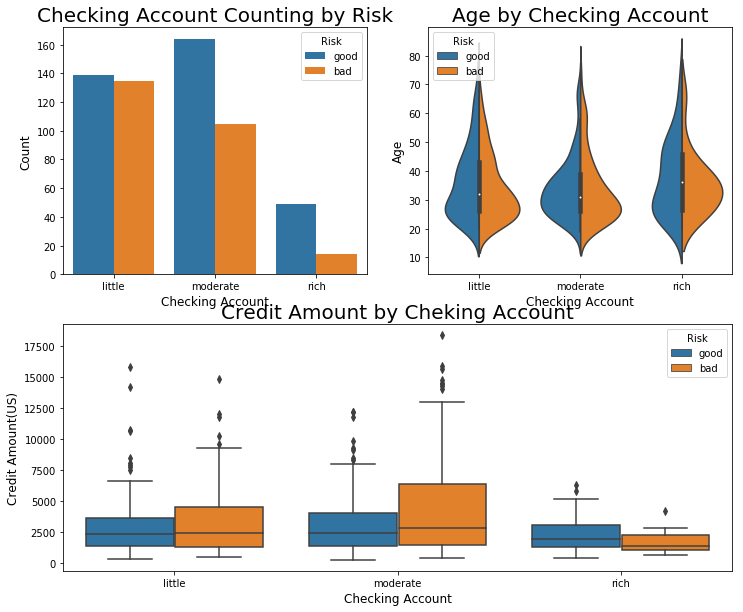

In [13]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk')
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)



plt.show()
plt.show()

<h3> Distribution of risk with respect to jobs ((numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled))<h3>

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

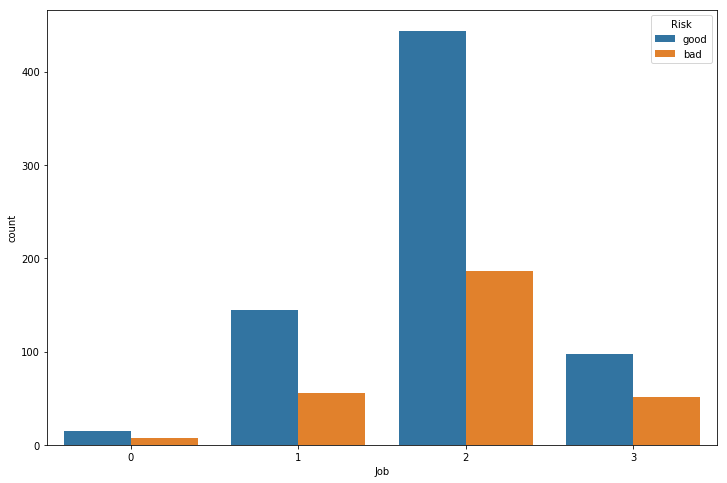

In [14]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Job", hue="Risk", data=df_credit)
fig.tight_layout


<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

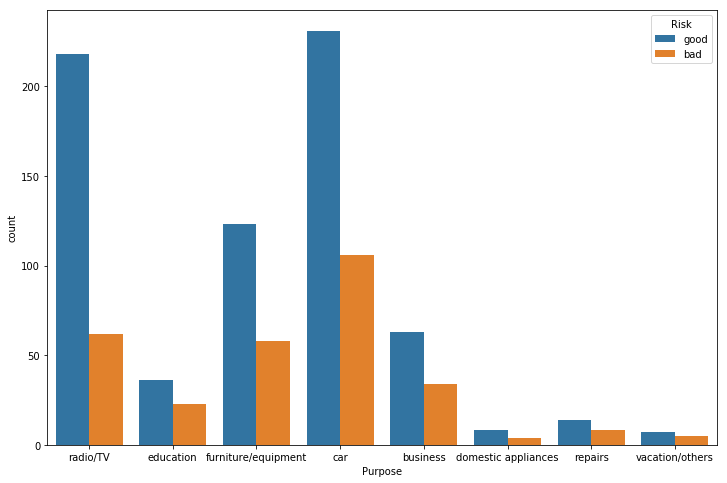

In [15]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Purpose", hue="Risk", data=df_credit)
fig.tight_layout


<h3> Now we will create categories according to the age <h3>

In [16]:
age_intervals = (18, 25, 35, 60)

groups = ['Kids(upto 18)', 'Young Adults', 'Adults']
df_credit["Age_cat"] = pd.cut(df_credit.Age, age_intervals, labels=groups)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

The following distribution tells us how the credit amout required grows with the age 


In [17]:
trace0 = go.Box(
    y=df_good["Credit amount"],x=df_good["Age_cat"],name='Good credit')

trace1 = go.Box(y=df_bad['Credit amount'],x=df_bad['Age_cat'],name='Bad credit')
    
data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Credit Amount (USD)',zeroline=False),xaxis=dict(title='Age Categorical'),
    boxmode='group')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [18]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


<h4> P.S: Folks love their Folkswagen:) <h4>

<h2> Let's Try Some Modeling <h2>  :)

<h3> 1. First we will create dummy variables because our logistic model can not interpret non numerical features. 

2. We will fill all the null values with average or null values to avoid spikes in the training 

3. We will delete the old features onec ONE HOT ENCODING is done.

4. check the correlation between all the features to avoid uninfluential features

<h3>



In [19]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


In [20]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [21]:
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

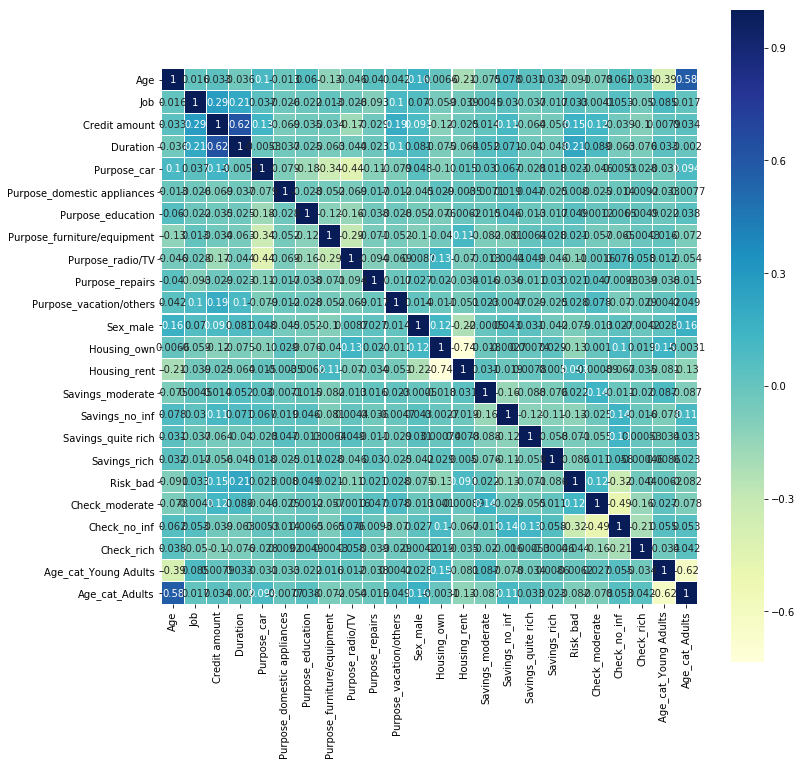

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,cmap = 'YlGnBu',vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()

In [27]:
#Importing all the libs 

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import  cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

#spliting the dataset for training and testing 

X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

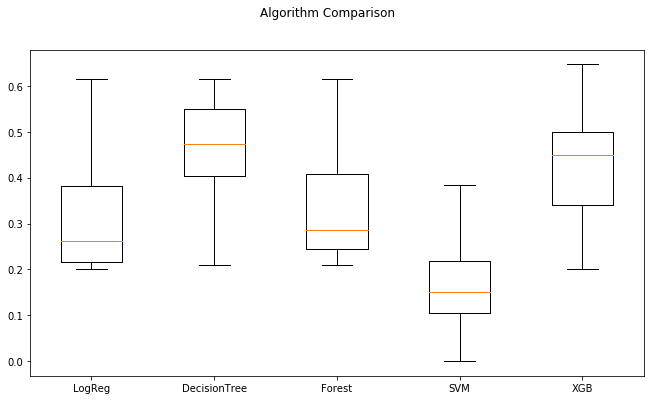

In [29]:
#comparison 

ml_lib = []

ml_lib.append(('LogReg', LogisticRegression()))
ml_lib.append(('DecisionTree', DecisionTreeClassifier()))
ml_lib.append(('Forest', RandomForestClassifier()))
ml_lib.append(('SVM', SVC()))
ml_lib.append(('XGB', XGBClassifier()))


results = []
names = []

seed = 5
scoring = 'recall'
for name, model in ml_lib:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
    
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()      

We can tell recall for the 5 algorithms is low. It's a tough decision to choose one on a limited resoursed computer as we can not run tunning on all of them.

In [30]:
lg = LogisticRegression()
model = lg.fit(X_train, y_train)

print('Training score',model.score(X_train, y_train))
print("\n")
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Training score 0.7477611940298508


0.7515151515151515


[[211  15]
 [ 67  37]]


             precision    recall  f1-score   support

          0       0.76      0.93      0.84       226
          1       0.71      0.36      0.47       104

avg / total       0.74      0.75      0.72       330



In [31]:
xgb= XGBClassifier()
model = xgb.fit(X_train, y_train)

print('Training score',model.score(X_train, y_train))
print("\n")
print('accuracy score')
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Training score 0.8522388059701492


accuracy score
0.7393939393939394


[[201  25]
 [ 61  43]]


             precision    recall  f1-score   support

          0       0.77      0.89      0.82       226
          1       0.63      0.41      0.50       104

avg / total       0.72      0.74      0.72       330



C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



We can tell that XGB performs a little better than normal logistic regression but still not as expected. 


<h2> HyperParameter Tuning to the rescue ? <h2>

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3,5,6,10],'min_child_weight':[3,5,10],'gamma':[0.0, 0.1, 0.2, 0.3, 0.4]}

model = XGBClassifier()

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] gamma=0.0, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.0, max_depth=3, min_child_weight=3, score=0.3, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value 

[CV]  gamma=0.0, max_depth=3, min_child_weight=3, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.0, max_depth=3, min_child_weight=3, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value 

[CV]  gamma=0.0, max_depth=3, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.0, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.0, max_depth=3, min_child_weight=3, score=0.5384615384615384, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=3, min_child_weight=5, score=0.325, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.0, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=3, min_child_weight=5, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.0, max_depth=3, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=3, min_child_weight=5, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=3, min_child_weight=10, score=0.35, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=3, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.0, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=3, min_child_weight=10, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.0, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=5, min_child_weight=3, score=0.325, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.0, max_depth=5, min_child_weight=3, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.0, max_depth=5, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=5, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.0, max_depth=5, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=5, min_child_weight=5, score=0.35, total=   0.0s
[CV] gamma=0.0, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.0, max_depth=5, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.0, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=5, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.0, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.0, max_depth=5, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.0, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=5, min_child_weight=5, score=0.38461538461538464, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=5, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.0, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.0, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=5, min_child_weight=10, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=6, min_child_weight=3, score=0.325, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.0, max_depth=6, min_child_weight=3, score=0.38461538461538464, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=6, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=6, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=6, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.0, max_depth=6, min_child_weight=5, score=0.4, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=6, min_child_weight=5, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=6, min_child_weight=5, score=0.5384615384615384, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=6, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.0, max_depth=6, min_child_weight=5, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=6, min_child_weight=10, score=0.4, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.0, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=6, min_child_weight=10, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.0, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=6, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.0, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=3, score=0.325, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=3, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=5, score=0.375, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=5, score=0.5641025641025641, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.0, max_depth=10, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=5 .....................
[CV]  gamma=0.0, max_depth=10, min_child_weight=5, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.0, max_depth=10, min_child_weight=10, score=0.4, total=   0.0s
[CV] gamma=0.0, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=10, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.0, max_depth=10, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.0, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.0, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.0, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.0, max_depth=10, min_child_weight=10, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.1, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=3, score=0.325, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=3, min_child_weight=3, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=3, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=3, min_child_weight=3, score=0.5384615384615384, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=3, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=3, min_child_weight=5, score=0.325, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=3, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=10, score=0.35, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.1, max_depth=3, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.1, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.1, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=3, min_child_weight=10, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.1, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=5, min_child_weight=3, score=0.3, total=   0.0s
[CV] gamma=0.1, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=5, min_child_weight=3, score=0.38461538461538464, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=5, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=5, min_child_weight=3, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.1, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=5, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=5, min_child_weight=5, score=0.375, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=5, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=5, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.1, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=5, min_child_weight=5, score=0.5384615384615384, total=   0.0s
[CV] gamma=0.1, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=5, min_child_weight=5, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.1, max_depth=5, min_child_weight=10, score=0.4, total=   0.0s
[CV] gamma=0.1, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=5, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.1, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.1, max_depth=5, min_child_weight=10, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.1, max_depth=5, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.1, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=6, min_child_weight=3, score=0.3, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=6, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=6, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=6, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.1, max_depth=6, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=6, min_child_weight=5, score=0.425, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=6, min_child_weight=5, score=0.48717948717948717, total=   0.1s


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV] gamma=0.1, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=6, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=6, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.1, max_depth=6, min_child_weight=5, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=6, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.1, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.1, max_depth=6, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.1, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.1, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=6, min_child_weight=10, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=10, min_child_weight=3, score=0.375, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=10, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=10, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=10, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=10, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=5 .....................
[CV]  gamma=0.1, max_depth=10, min_child_weight=5, score=0.325, total=   0.1s


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV] gamma=0.1, max_depth=10, min_child_weight=5 .....................
[CV]  gamma=0.1, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=10, min_child_weight=5, score=0.5384615384615384, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=10, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.1, max_depth=10, min_child_weight=5, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.1, max_depth=10, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.1, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=10, min_child_weight=10, score=0.5384615384615384, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.1, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.1, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.1, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.1, max_depth=10, min_child_weight=10, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.2, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=3, score=0.325, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.2, max_depth=3, min_child_weight=3, score=0.38461538461538464, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=3, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.2, max_depth=3, min_child_weight=3, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=3, score=0.5128205128205128, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=3, min_child_weight=5, score=0.325, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=5, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=5, score=0.5128205128205128, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=10, score=0.35, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.2, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.2, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.2, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=3, min_child_weight=10, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.2, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.2, max_depth=5, min_child_weight=3, score=0.3, total=   0.0s
[CV] gamma=0.2, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=5, min_child_weight=3, score=0.38461538461538464, total=   0.0s
[CV] gamma=0.2, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.2, max_depth=5, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.2, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=5, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.2, max_depth=5, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=5, min_child_weight=5, score=0.4, total=   0.1s
[CV] gamma=0.2, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=5, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.2, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=5, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.2, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=5, min_child_weight=5, score=0.48717948717948717, total=   0.1s


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV] gamma=0.2, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=5, min_child_weight=5, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.2, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=5, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.2, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.2, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.2, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.2, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=5, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.2, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.2, max_depth=6, min_child_weight=3, score=0.325, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=6, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.2, max_depth=6, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=6, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=6, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=6, min_child_weight=5, score=0.4, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=6, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=6, min_child_weight=5, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.2, max_depth=6, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.2, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=6, min_child_weight=5, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.2, max_depth=6, min_child_weight=10, score=0.375, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=6, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.2, max_depth=6, min_child_weight=10, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.2, max_depth=6, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.2, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=3, score=0.35, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=3, score=0.5384615384615384, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=5, score=0.4, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.2, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=10, min_child_weight=5, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.2, max_depth=10, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.2, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.2, max_depth=10, min_child_weight=10, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.2, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.2, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.2, max_depth=10, min_child_weight=10, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.3, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=3, score=0.3, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.3, max_depth=3, min_child_weight=3, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=3, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.3, max_depth=3, min_child_weight=3, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=3, score=0.5128205128205128, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.3, max_depth=3, min_child_weight=5, score=0.325, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.3, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.3, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=10, score=0.35, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=10, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.3, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=3, min_child_weight=10, score=0.38461538461538464, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.3, max_depth=5, min_child_weight=3, score=0.3, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=5, min_child_weight=3, score=0.38461538461538464, total=   0.1s
[CV] gamma=0.3, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.3, max_depth=5, min_child_weight=3, score=0.5128205128205128, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=5, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.3, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.3, max_depth=5, min_child_weight=3, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=5, min_child_weight=5, score=0.375, total=   0.1s
[CV] gamma=0.3, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.3, max_depth=5, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=5, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.3, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.3, max_depth=5, min_child_weight=5, score=0.5128205128205128, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=5, min_child_weight=5, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.3, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=5, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=5, min_child_weight=10, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.3, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.3, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=5, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.3, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=6, min_child_weight=3, score=0.35, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.3, max_depth=6, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=6, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.3, max_depth=6, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=6, min_child_weight=3, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.3, max_depth=6, min_child_weight=5, score=0.425, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=6, min_child_weight=5, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.3, max_depth=6, min_child_weight=5, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=6, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=6, min_child_weight=5, score=0.38461538461538464, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=6, min_child_weight=10, score=0.375, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=6, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.3, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.3, max_depth=6, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.3, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=3, score=0.35, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=3, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=3, score=0.5384615384615384, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=3, score=0.38461538461538464, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=3, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=5, score=0.4, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.3, max_depth=10, min_child_weight=5, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.3, max_depth=10, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.3, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=10, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.3, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.3, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.3, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.3, max_depth=10, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=3, score=0.325, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.4, max_depth=3, min_child_weight=3, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=3, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=3 ......................
[CV]  gamma=0.4, max_depth=3, min_child_weight=3, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=3, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.4, max_depth=3, min_child_weight=5, score=0.325, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.4, max_depth=3, min_child_weight=5, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=5, score=0.5128205128205128, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=5 ......................
[CV]  gamma=0.4, max_depth=3, min_child_weight=5, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=10, score=0.35, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=3, min_child_weight=10, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.4, max_depth=3, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=3, min_child_weight=10, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.4, max_depth=5, min_child_weight=3, score=0.3, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=5, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.4, max_depth=5, min_child_weight=3, score=0.5128205128205128, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=5, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=5, min_child_weight=3 ......................
[CV]  gamma=0.4, max_depth=5, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.4, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=5, min_child_weight=5, score=0.375, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.4, max_depth=5, min_child_weight=5, score=0.46153846153846156, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=5, min_child_weight=5, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.4, max_depth=5, min_child_weight=5 ......................
[CV]  gamma=0.4, max_depth=5, min_child_weight=5, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.4, max_depth=5, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=5, min_child_weight=5, score=0.41025641025641024, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=5, min_child_weight=10, score=0.375, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=5, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.4, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.4, max_depth=5, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=5, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=5, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=5, min_child_weight=10, score=0.4358974358974359, total=   0.0s
[CV] gamma=0.4, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=6, min_child_weight=3, score=0.325, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.4, max_depth=6, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=6, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=3 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=6, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=3 ......................
[CV]  gamma=0.4, max_depth=6, min_child_weight=3, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=6, min_child_weight=5, score=0.425, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.4, max_depth=6, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=6, min_child_weight=5, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=5 ......................
[CV]  gamma=0.4, max_depth=6, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=5 ......................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=6, min_child_weight=5, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=6, min_child_weight=10, score=0.375, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=6, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=6, min_child_weight=10, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=10 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=6, min_child_weight=10, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=6, min_child_weight=10 .....................
[CV]  gamma=0.4, max_depth=6, min_child_weight=10, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=3, score=0.325, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=3, score=0.41025641025641024, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=3, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=3, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=3 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=3, score=0.41025641025641024, total=   0.2s
[CV] gamma=0.4, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=5, score=0.4, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV]  gamma=0.4, max_depth=10, min_child_weight=5, score=0.48717948717948717, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=5 .....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=10, min_child_weight=5, score=0.4358974358974359, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.4, max_depth=10, min_child_weight=10, score=0.375, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=10, min_child_weight=10, score=0.5128205128205128, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.4, max_depth=10, min_child_weight=10, score=0.46153846153846156, total=   0.1s
[CV] gamma=0.4, max_depth=10, min_child_weight=10 ....................


C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

[CV]  gamma=0.4, max_depth=10, min_child_weight=10, score=0.48717948717948717, total=   0.0s
[CV] gamma=0.4, max_depth=10, min_child_weight=10 ....................
[CV]  gamma=0.4, max_depth=10, min_child_weight=10, score=0.4358974358974359, total=   0.1s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 6, 10], 'min_child_weight': [3, 5, 10], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=4)

In [33]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.4646526980482205
{'gamma': 0.1, 'max_depth': 10, 'min_child_weight': 10}


In [34]:
xgb= XGBClassifier(gamma = 0.1, max_depth= 10, min_child_weight= 10)
model = xgb.fit(X_train, y_train)

print('Training score',model.score(X_train, y_train))
print("\n")
print('accuracy score')
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Training score 0.844776119402985


accuracy score
0.7363636363636363


[[199  27]
 [ 60  44]]


             precision    recall  f1-score   support

          0       0.77      0.88      0.82       226
          1       0.62      0.42      0.50       104

avg / total       0.72      0.74      0.72       330



C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



The Hyperparameter tuning for XGB did not help much but we can run simultaneous tunings to find the best model and parameters for this dataset. 

Also, we can use feature engineering to interpret the features better than we did